In [2]:
import numpy as np
from scifit.solvers import linear, scientific, specials
from scifit.interfaces import solvers

In [5]:
class Taylor(solvers.FitSolver1D):
    @staticmethod
    def model(x, a, b, c):
        return a * np.power(x[:, 0], 2)  + b * np.power(x[:, 0], 1) + c * np.power(x[:, 0], 0) 

class Exp(solvers.FitSolver1D):
    @staticmethod
    def model(x, a, b, c):
        return a * np.exp(b * x[:, 0]) + c

In [6]:
models = [Exp(), Taylor()]

In [7]:
labels = {
    "Exp": r"$y = a e^{b x_1} + c$",
    "Taylor": r"$y = ax^2_1 + bx_1 + c$",
}

In [8]:
data = models[0].synthetic_dataset(sigma=0.015, xmin=2., xmax=2.5, resolution=30, parameters=[2.0, 1.0, 3.0], scale_mode="auto")

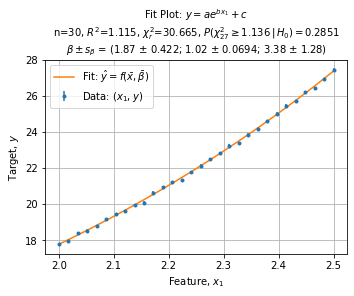

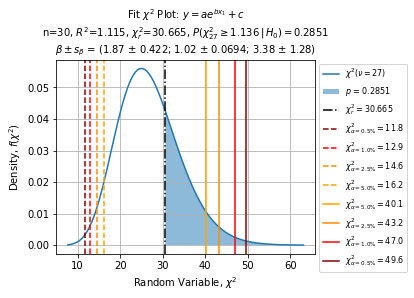

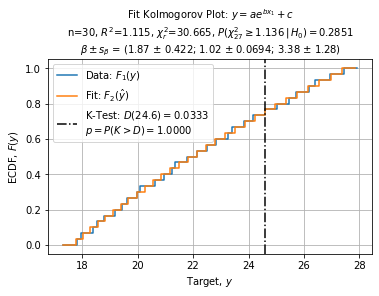

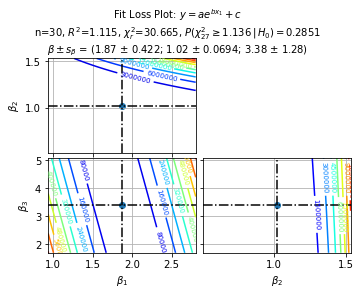

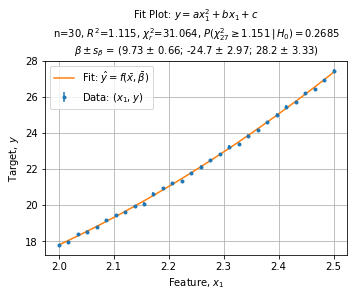

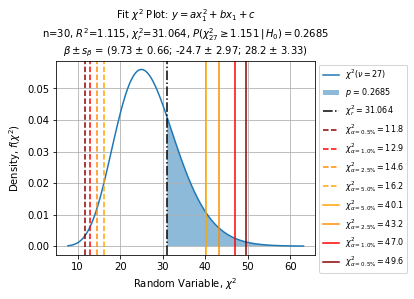

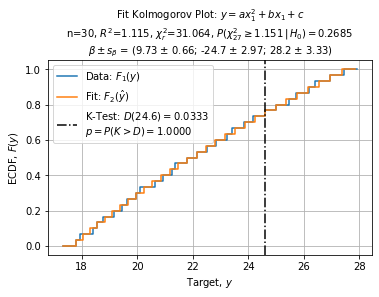

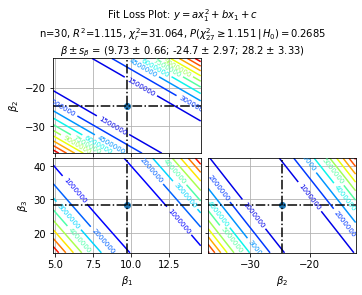

In [10]:
for i, model in enumerate(models):
    
    name = model.__class__.__name__
    title = labels[name]
    file = "Taylor_y{}".format(i)
    
    sol = model.fit(data)
    
    axe = model.plot_fit(title=title)
    axe.figure.savefig("figures/IntroPolynomial/{}_fit.pdf".format(file))
    
    axe = model.plot_chi_square(title=title)
    axe.figure.savefig("figures/IntroPolynomial/{}_chi2.pdf".format(file))
    
    axe = model.plot_kolmogorov(title=title)
    axe.figure.savefig("figures/IntroPolynomial/{}_k2s.pdf".format(file))
    
    axe = model.plot_loss(title=title)
    axe[0][0].figure.savefig("figures/IntroPolynomial/{}_loss.pdf".format(file))